In [ ]:
import pandas as pd

url1 = "https://node-red.cloudprecis.upb.ro/api/dorinel/get-elsys/ers-eye02?access_token=llsf_event"
url2 = "https://node-red.cloudprecis.upb.ro/api/dorinel/get-elsys/ers-eye04?access_token=llsf_event"

df1 = pd.read_csv(url1, parse_dates=['time'])
df2 = pd.read_csv(url2, parse_dates=['time'])



In [ ]:
df1.head()
df1.describe()

,time,humidity,light,motion,occupancy,temperature,vdd
count,2000,1721.000000,1721.000000,2000.000000,2000.000000,1721.000000,1721.000000
mean,2025-01-08 06:29:32.210000128,27.343986,29.495061,0.218500,0.143000,23.314468,3652.854736
min,2025-01-01 23:26:16,16.000000,1.000000,0.000000,0.000000,21.700000,3524.000000
25%,2025-01-05 10:43:27,24.000000,1.000000,0.000000,0.000000,22.100000,3653.000000
50%,2025-01-08 12:06:23.500000,28.000000,1.000000,0.000000,0.000000,23.300000,3656.000000
75%,2025-01-10 23:37:56,30.000000,47.000000,0.000000,0.000000,24.200000,3659.000000
max,2025-01-13 22:45:10,36.000000,249.000000,11.000000,2.000000,26.800000,3659.000000
std,NaN,4.013231,48.908673,0.773341,0.366904,1.323308,9.905826


In [ ]:
df2.head()

,time,humidity,light,motion,occupancy,temperature,vdd
0,2025-01-13 20:10:30,17.0,0.0,0,0,24.7,3653.0
1,2025-01-13 20:00:30,17.0,0.0,0,0,25.1,3655.0
2,2025-01-13 19:50:30,17.0,0.0,0,0,24.7,3655.0
3,2025-01-13 19:40:30,17.0,0.0,0,0,24.8,3655.0
4,2025-01-13 19:30:30,18.0,0.0,0,0,24.9,3655.0


In [ ]:
from datetime import timedelta
df1.sort_values(by='time', inplace=True)
df2.sort_values(by='time', inplace=True)
df2['time2'] = df2['time']

merged = pd.merge_asof(df1, df2, on='time', direction='nearest', tolerance=pd.Timedelta('15m'), suffixes=('_eye02', '_eye04'))
#merged.dropna(inplace=True)
merged.head()

,time,humidity_eye02,light_eye02,motion_eye02,occupancy_eye02,temperature_eye02,vdd_eye02,humidity_eye04,light_eye04,motion_eye04,occupancy_eye04,temperature_eye04,vdd_eye04,time2
0,2025-01-01 20:56:16,30.0,1.0,0,0,22.0,3656.0,26.0,0.0,0,0,24.7,3661.0,2025-01-01 20:51:38
1,2025-01-01 21:06:16,30.0,1.0,0,0,21.9,3656.0,26.0,0.0,0,0,24.9,3658.0,2025-01-01 21:01:38
2,2025-01-01 21:16:16,30.0,1.0,0,0,21.8,3656.0,26.0,0.0,0,0,24.9,3661.0,2025-01-01 21:11:38
3,2025-01-01 21:26:16,30.0,1.0,0,0,21.8,3656.0,26.0,0.0,0,0,24.6,3661.0,2025-01-01 21:21:38
4,2025-01-01 21:36:16,30.0,1.0,0,0,22.2,3659.0,26.0,0.0,0,0,24.9,3658.0,2025-01-01 21:31:38


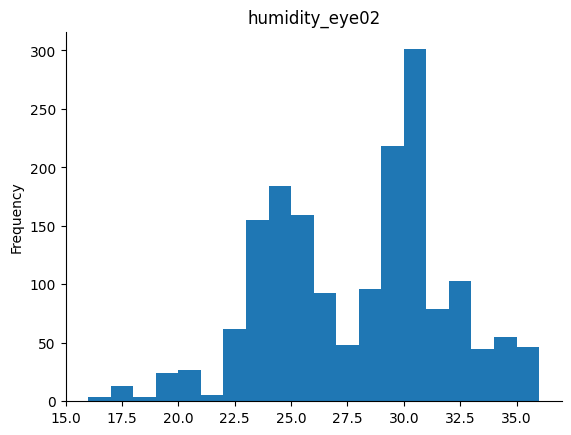

In [ ]:
# @title humidity_eye02

from matplotlib import pyplot as plt
merged['humidity_eye02'].plot(kind='hist', bins=20, title='humidity_eye02')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
merged['diff'] = merged['temperature_eye02'] - merged['temperature_eye04']
merged['diff'].describe()

,diff
count,1623.000000
mean,-1.628959
std,1.272215
min,-3.300000
25%,-2.800000
50%,-1.700000
75%,-0.800000
max,2.100000
